# EDA - DECISION TREE ALGO
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.


https://www.niddk.nih.gov/health-information/informacion-de-la-salud/diabetes/embarazo-diabetes# EDA 

In [1]:
# Your code here


import pandas as pd

db_health = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
db_health.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies. Número de embarazos del paciente (numérico)
Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
BMI. Índice de masa corporal (numérico)
DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
Age. Edad del paciente (numérico)
Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)


Normalmente, los niveles de insulina y glucosa en la sangre suben y bajan al mismo tiempo:

Agregan embarazos por la diabetes materna
Los principales tipos de diabetes son tipo 1, tipo 2 y gestacional.

Los resultados de la prueba oral de tolerancia a la glucosa se otorgan en miligramos por decilitro (mg/dL) o milimoles por litro (mmol/L).

GLUCOSA
Un nivel de glucosa en sangre normal es inferior a 140 mg/dL (7,8 mmol/L).
Un nivel de glucosa en sangre que oscila entre 140 y 199 mg/dL (entre 7,8 y 11 mmol/L) se considera un trastorno de tolerancia a la glucosa o prediabetes. Si presentas prediabetes, corres el riesgo de desarrollar diabetes tipo 2 en algún momento. También corres el riesgo de desarrollar alguna enfermedad cardíaca aunque no desarrolles diabetes.
Un nivel de glucosa en sangre de 200 mg/dL (11,1 mmol/L) o más podría indicar la presencia de diabetes.
Cuando su nivel de azúcar en la sangre es bajo, la lectura será menor de 70 mg/dL
El bajo nivel de azúcar en la sangre es común en personas con diabetes que están tomando insulina u otros medicamentos para controlar esta enfermedad.

INSULINA
Una prueba de insulina en la sangre mide la cantidad de insulina en una muestra de su sangre. La insulina es una hormona que produce el páncreas. Ayuda a mover la glucosa en la sangre (azúcar en la sangre) desde el torrente sanguíneo a sus células donde se utiliza como energía.
Si su páncreas produce demasiada insulina, usted puede tener muy poca glucosa en la sangre. Esto se llama hipoglucemia. Si sus niveles de glucosa disminuyen a un nivel muy bajo (hipoglucemia severa), las células de su cerebro pueden no tener suficiente glucosa para trabajar adecuadamente. Esta es una afección seria que necesita tratamiento médico inmediato
Si su páncreas produce muy poca insulina, la glucosa no puede entrar en las células desde su sangre. La glucosa se acumula en el torrente sanguíneo hasta ser demasiado altos. Esto se llama hiperglucemia. Si sus niveles de glucosa se mantienen altos, con el tiempo puede desarrollar diabetes tipo 2, la cual puede causar complicaciones serias en ojos, corazón y otras partes del cuerpo

Un pliegue cutáneo mide indirectamente el grosor del tejido adiposo subcutáneo.

La hiperinsulina y el sobrepeso se encuentran altamente relacionados, puesto que se propician entre sí.
Hiperinsulinemia significa que la cantidad de insulina en la sangre es superior a lo que se considera saludable. Por sí sola, la hiperinsulinemia no es diabetes. Pero la hiperinsulinemia suele asociarse a la diabetes tipo 2.

La insulina es una hormona, producida por el páncreas, que ayuda a controlar la glucosa en la sangre. La hiperinsulinemia está relacionada con la resistencia a la insulina, un trastorno en el que el organismo no responde como debería a los efectos de la insulina. En esa situación, el páncreas produce más insulina para vencer la resistencia, lo que provoca mayores niveles de insulina en sangre. La diabetes tipo 2 se desarrolla cuando el páncreas ya no puede producir las grandes cantidades de insulina necesarias para mantener la glucosa en la sangre a un nivel saludabl

If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range


It is the function that calculates the likelihood of diabetes in a patient based on his/her family history. The
amount of genetic influence provides an idea of the patients’ hereditary risks for the onset of diabetes.


In [2]:
#Dimensiones del conjunto

db_health.shape

(768, 9)

In [3]:
db_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#ELIMINAR DUPLICADOS

db_health = db_health.drop_duplicates().reset_index(drop= True)
db_health.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


ANALISIS DE VARIABLES NUMERICAS


'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'

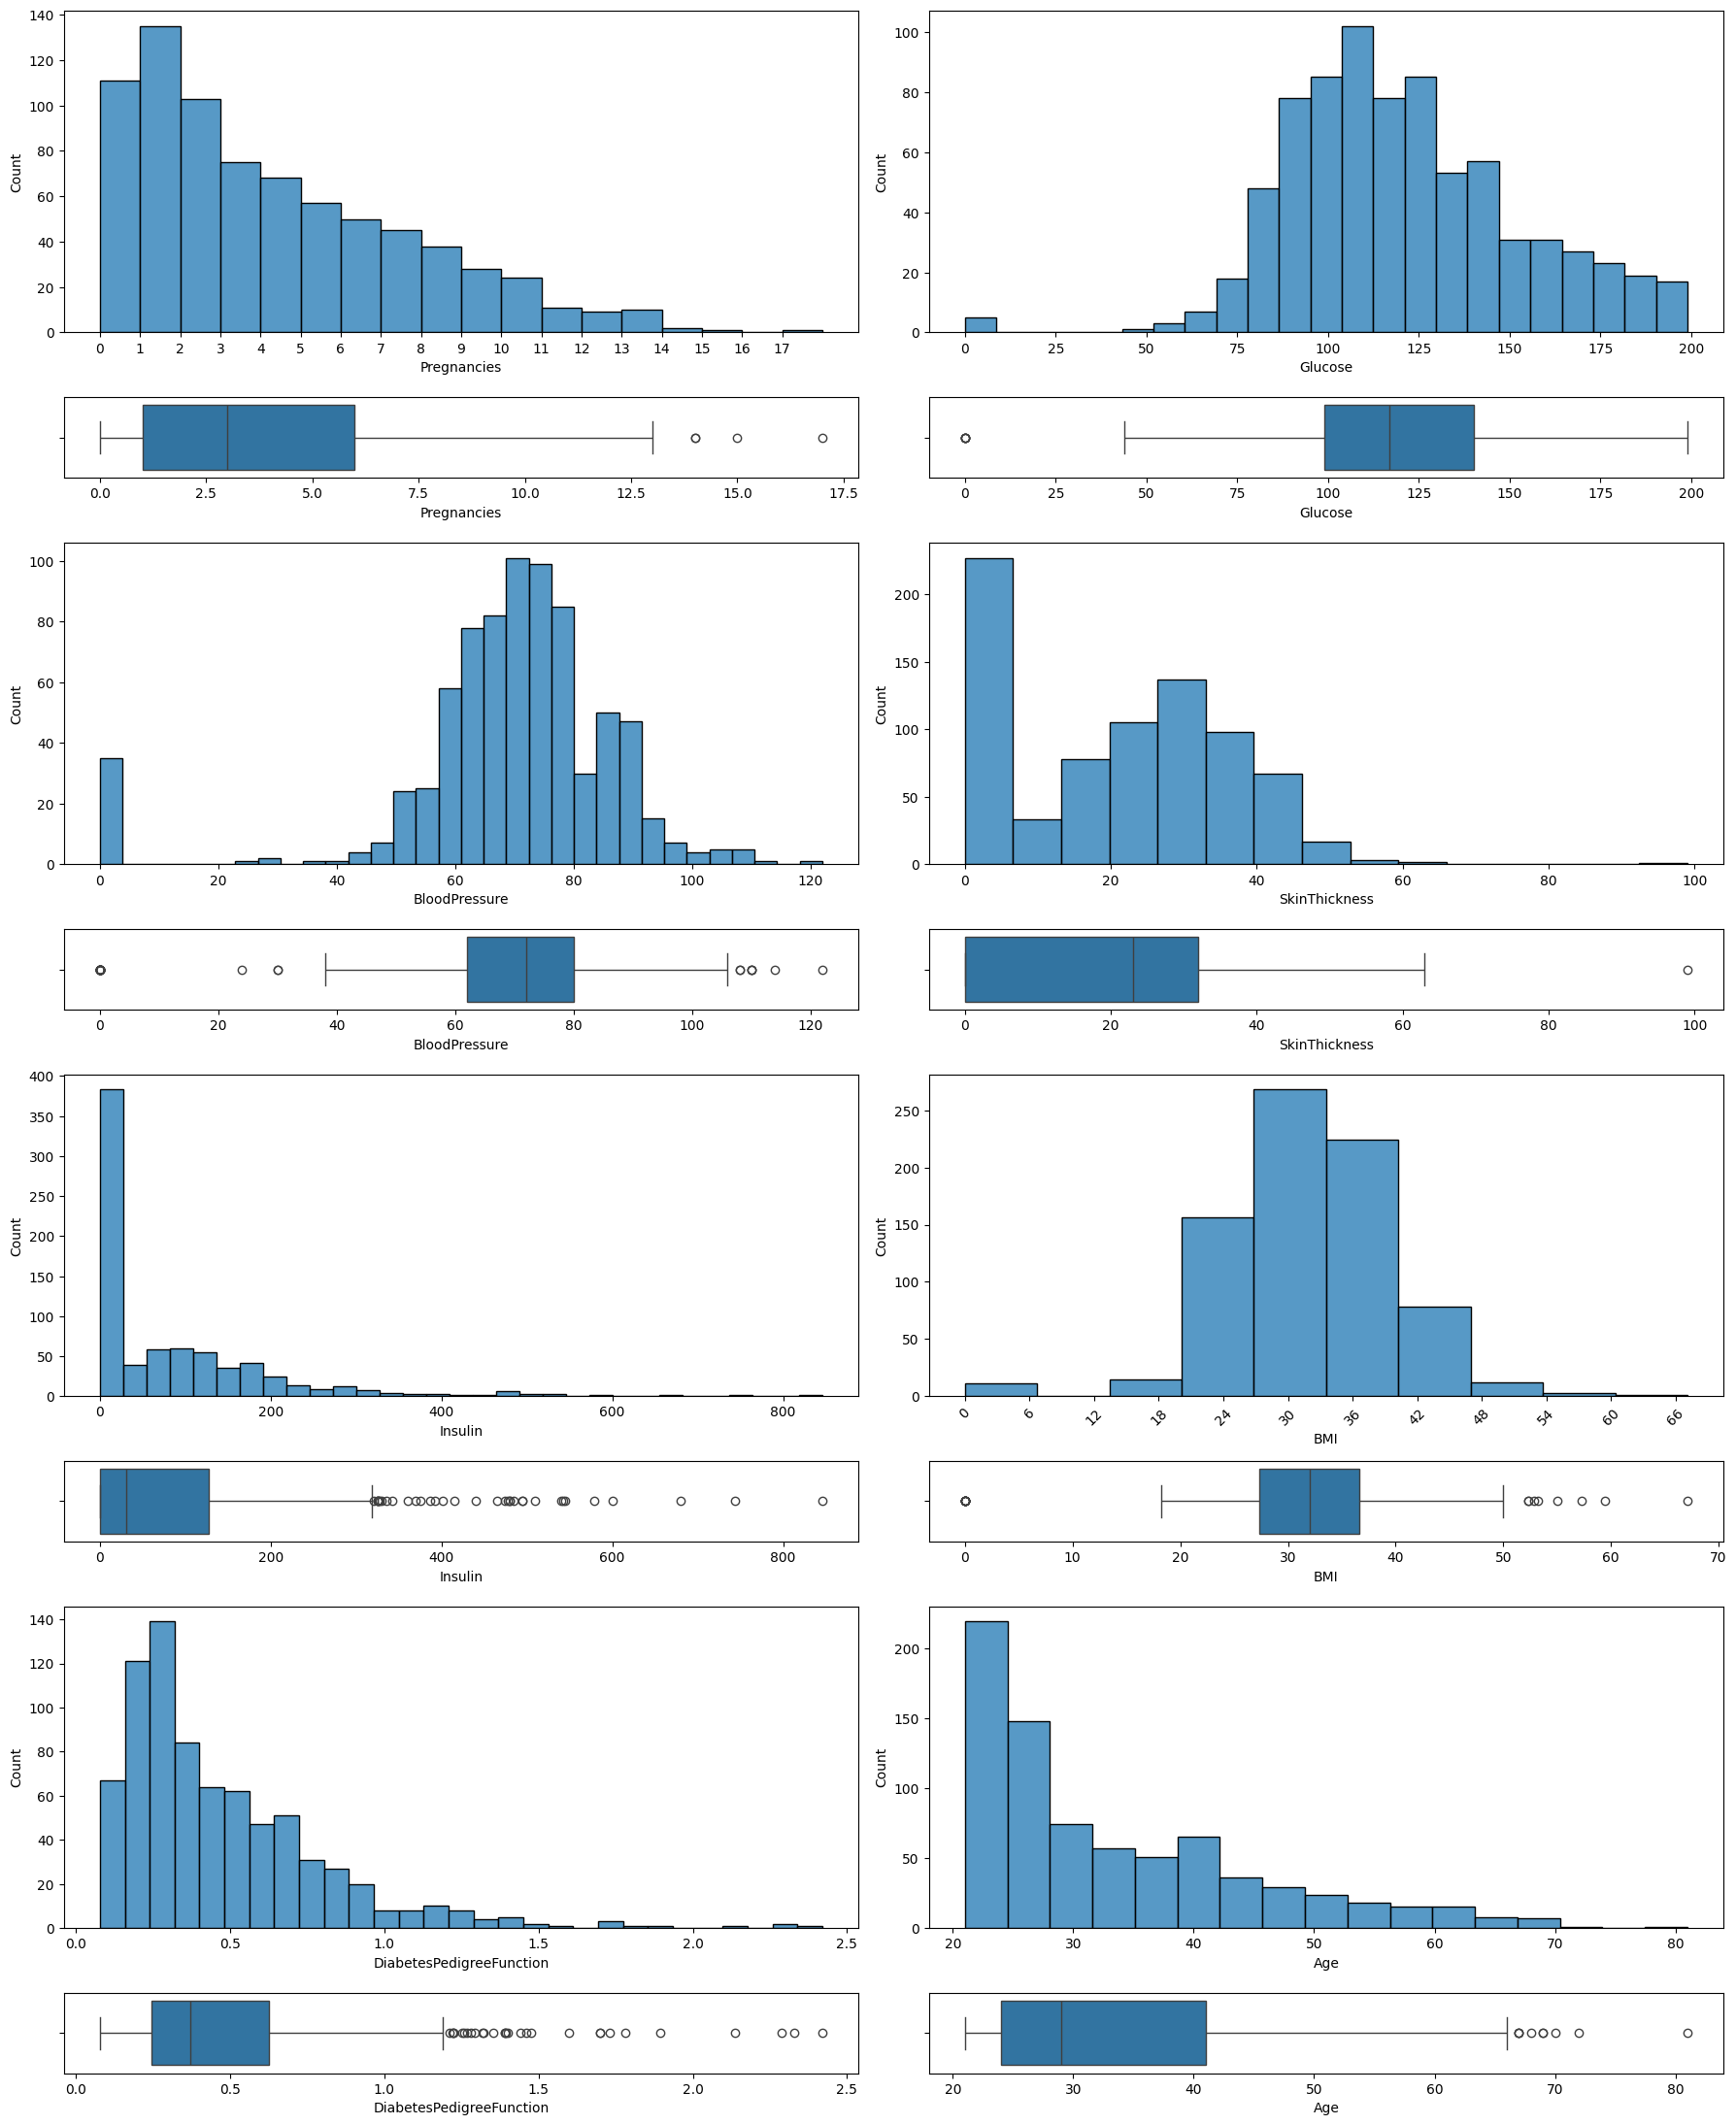

In [5]:
#HISTOGRAMAS Y BOXPLOTS DE VARIALBES NUMERICAS

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(8, 2, figsize = (18, 22),  gridspec_kw={"height_ratios": [8, 2, 8, 2, 8, 2, 8, 2]})

sns.histplot(ax=axis[0, 0], data=db_health, x='Pregnancies', bins=range(db_health['Pregnancies'].min(), db_health['Pregnancies'].max() + 2))
axis[0, 0].set_xticks(range(db_health['Pregnancies'].min(), db_health['Pregnancies'].max() + 1))
sns.boxplot(ax=axis[1,0], data=db_health, x='Pregnancies')


sns.histplot(ax=axis[0, 1], data=db_health, x='Glucose')
sns.boxplot(ax=axis[1, 1], data=db_health, x='Glucose')  

sns.histplot(ax=axis[2, 0], data=db_health, x='BloodPressure')
sns.boxplot(ax=axis[3, 0], data=db_health, x='BloodPressure')  

sns.histplot(ax=axis[2, 1], data=db_health, x='SkinThickness')
sns.boxplot(ax=axis[3, 1], data=db_health, x='SkinThickness')  

sns.histplot(ax=axis[4, 0], data=db_health, x='Insulin')
sns.boxplot(ax=axis[5, 0], data=db_health, x='Insulin')  


sns.histplot(ax=axis[4, 1], data=db_health, x='BMI', bins=10)
bins = 10  # Número de bins en el histograma
axis[4, 1].set_xticks(range(int(db_health['BMI'].min()), int(db_health['BMI'].max()) + 1, int((db_health['BMI'].max() - db_health['BMI'].min()) / bins)))
axis[4, 1].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axis[5, 1], data=db_health, x='BMI') 

sns.histplot(ax=axis[6, 0], data=db_health, x='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[7, 0], data=db_health, x='DiabetesPedigreeFunction')  

sns.histplot(ax=axis[6, 1], data=db_health, x='Age')
sns.boxplot(ax=axis[7, 1], data=db_health, x='Age')  


#Ajustar el graf
plt.tight_layout()

#mostrame
plt.show()

DE los graficos podemos observar:
1- Un 50% de las personas tuvo  de 1 a 6 embarazos. Siendo la cantidad maxima de embarazos registrados de 14 en la muestra, con outliers que traspasan los 14 embarazos
2- El 50% de las personas muestra un nivel de glucosa en sangre normal, inferior a 140 mg/dl.  Vemos personas con nivel de glucosa entre cuarenta y poco y 75, que se considera nivel bajo, siendo el minimo un valor peligroso para la salud. y outlier en 0 (la persona estaria en estado de crisis epileptica y dano cerebral). Un 25% de las personas tienen un nivel de glucosa que oscila entre 140 y 200 mg/dL (entre 7,8 y 11 mmol/L), que se considera un trastorno de tolerancia a la glucosa o prediabetes.
3- Mirando la presion arterial, vemos que un 25% de las personas tiene presion alta, ya que sus lecturas diastólicas son por encima de 80 mm Hg. Un 50% de las personas tienen entre 60 y poco y 80, que se considera normal  - El 25% restante tiene una presion diastolica menor a 60 lo que puede considerarse bajo (para muchas personas este nivel de presion baja es lo normal).  VAlores bajos tmabien pueden verse en mayores adultos, por endurecimeinto de arterias. Vemos outliers en 0, valor que no es fisiologicamente posible.
4- El 50% de las personas tiene de 0 a 30 mm de grosor en el pliegue cutaneo del triceps.  
5- El 50% de las personas tiene un nivel de insulina serica de 0 a 150 μU/mL lo que se considera normal.  Vemos que un 25% tiene hasta 300 μU/mL lo que es muy elevado y hay muchos outliers con vavlores de mas de 300 μU/mL. Estos casos podrian considerarse de hiperinsulinemia, que está relacionada con la resistencia a la insulina, un trastorno en el que el organismo no responde como debería a los efectos de la insulina. En esa situación, el páncreas produce más insulina para vencer la resistencia, lo que provoca mayores niveles de insulina en sangre. La diabetes tipo 2 se desarrolla cuando el páncreas ya no puede producir las grandes cantidades de insulina necesarias para mantener la glucosa en la sangre a un nivel saludable
6- Mirando los valores de BMI de las personas, vemos  que hay un outlier en 0, que no es factible. El menor valor es de aprox 18 y va hasta los 25, o sea que 25% de las personas tiene un peso considerado en el rango noraml. Casi el 75%de las persoans tiene un BMI en el ragno de obesidad

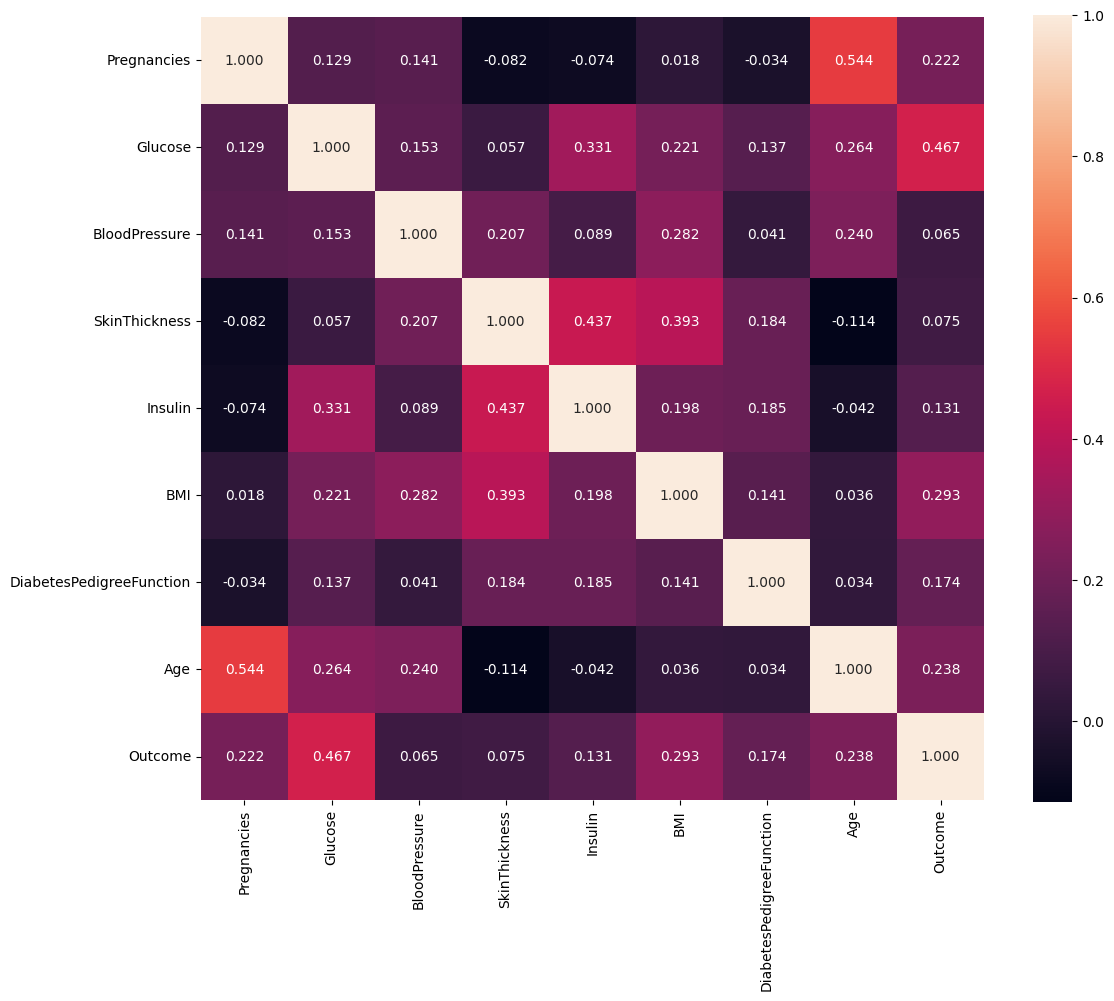

In [6]:
#Creando heatmap para ver la correlacion de las variables numericas entre si

#'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
  #     'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'

fig, axes = plt.subplots(figsize=(12, 10))

sns.heatmap(db_health[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".3f", cbar=True, square=True, ax=axes)

plt.tight_layout()

plt.show()


In [7]:
#ANALISIS DESCRIPTIVO DEL DS

db_health.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


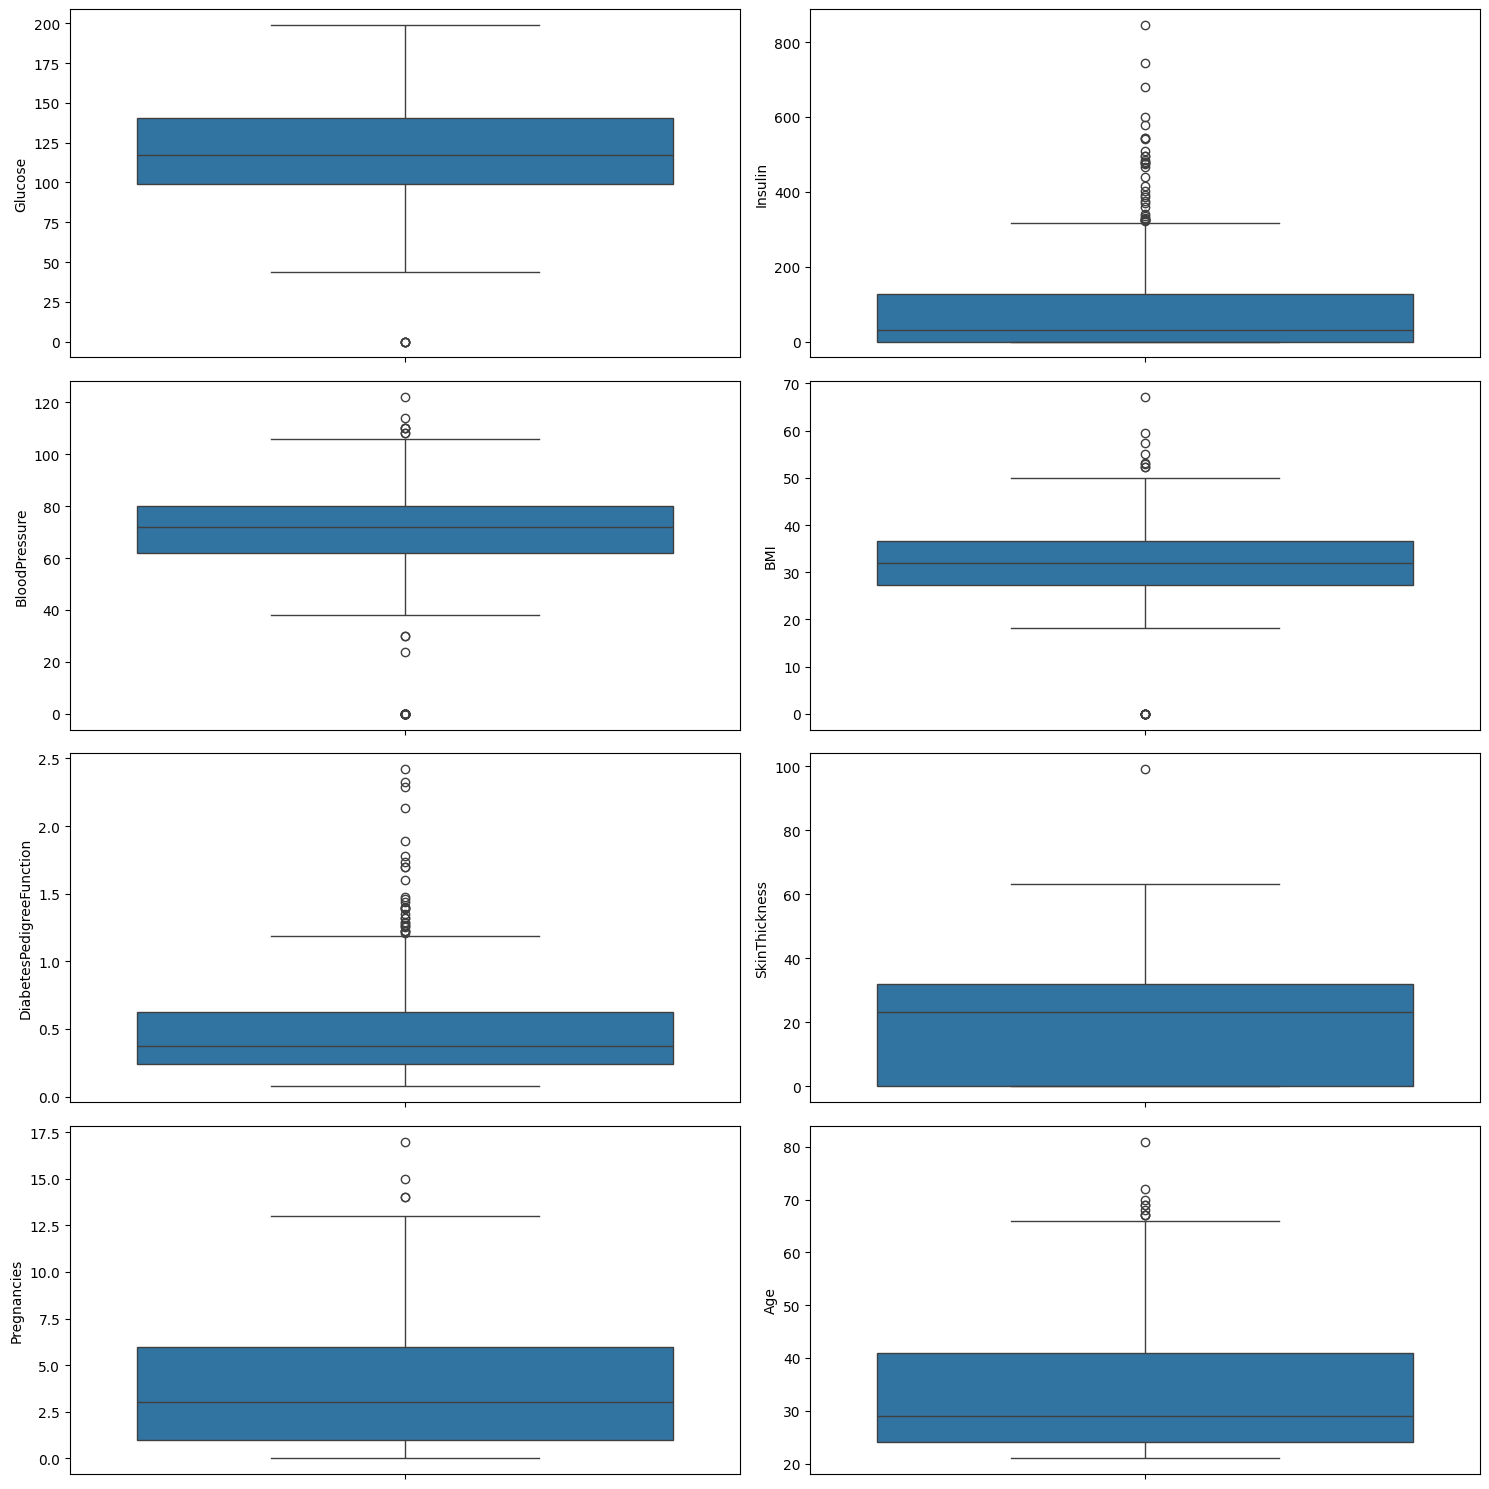

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#CREANDO BOXPLOTS PARA VER NUEVAMENTE LOS DATOS
fig, axis = plt.subplots(4, 2, figsize=(15, 15))

# Plot each variable
sns.boxplot(ax=axis[0, 0], data=db_health, y="Glucose")
sns.boxplot(ax=axis[0, 1], data=db_health, y="Insulin")
sns.boxplot(ax=axis[1, 0], data=db_health, y="BloodPressure")
sns.boxplot(ax=axis[1, 1], data=db_health, y="BMI")
sns.boxplot(ax=axis[2, 0], data=db_health, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[2, 1], data=db_health, y="SkinThickness")
sns.boxplot(ax=axis[3, 0], data=db_health, y="Pregnancies")
sns.boxplot(ax=axis[3, 1], data=db_health, y="Age")


plt.tight_layout()
plt.show()

DE los graficos podemos observar:
1- Un 50% de las personas tuvo  de 1 a 6 embarazos. Siendo la cantidad maxima de embarazos registrados de 14 en la muestra, con outliers que traspasan los 14 embarazos
2- El 50% de las personas muestra un nivel de glucosa en sangre normal, inferior a 140 mg/dl.  Vemos personas con nivel de glucosa entre cuarenta y poco y 75, que se considera nivel bajo, siendo el minimo un valor peligroso para la salud. y outlier en 0 (la persona estaria en estado de crisis epileptica y dano cerebral). Un 25% de las personas tienen un nivel de glucosa que oscila entre 140 y 200 mg/dL (entre 7,8 y 11 mmol/L), que se considera un trastorno de tolerancia a la glucosa o prediabetes.
3- Mirando la presion arterial, vemos que un 25% de las personas tiene presion alta, ya que sus lecturas diastólicas son por encima de 80 mm Hg. Un 50% de las personas tienen entre 60 y poco y 80, que se considera normal  - El 25% restante tiene una presion diastolica menor a 60 lo que puede considerarse bajo (para muchas personas este nivel de presion baja es lo normal).  VAlores bajos tmabien pueden verse en mayores adultos, por endurecimeinto de arterias. Vemos outliers en 0, valor que no es fisiologicamente posible.
4- El 50% de las personas tiene de 0 a 30 mm de grosor en el pliegue cutaneo del triceps.  
5- El 50% de las personas tiene un nivel de insulina serica de 0 a 150 μU/mL lo que se considera normal.  Vemos que un 25% tiene hasta 300 μU/mL lo que es muy elevado y hay muchos outliers con vavlores de mas de 300 μU/mL. Estos casos podrian considerarse de hiperinsulinemia, que está relacionada con la resistencia a la insulina, un trastorno en el que el organismo no responde como debería a los efectos de la insulina. En esa situación, el páncreas produce más insulina para vencer la resistencia, lo que provoca mayores niveles de insulina en sangre. La diabetes tipo 2 se desarrolla cuando el páncreas ya no puede producir las grandes cantidades de insulina necesarias para mantener la glucosa en la sangre a un nivel saludable
6- Mirando los valores de BMI de las personas, vemos  que hay un outlier en 0, que no es factible. El menor valor es de aprox 18 y va hasta los 25, o sea que 25% de las personas tiene un peso considerado en el rango noraml. Casi el 75%de las persoans tiene un BMI en el ragno de obesidad.
7- La edad minima de las personas del dataset es de 21 anos y el meximo de 81. El 75% de las personas tineen entre 25 y 40 anos. 

Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

In [9]:
#ANALISIS DE OUTLIERS  Glucose

glucose_stats = db_health["Glucose"].describe()

glucose_iqr = glucose_stats["75%"] - glucose_stats["25%"]
upper_limit = glucose_stats["75%"] +1.5 * glucose_iqr
lower_limit = glucose_stats["25%"] -1.5 * glucose_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(glucose_iqr, 2)}") 

The upper and lower limits for finding outliers are 202.12 and 37.12, with an interquartile range of 41.25


In [10]:
#VER CACUALE UTNOS SON LOS OUTLIERS GLUCOSA

outliers = db_health[(db_health['Glucose'] < lower_limit) | (db_health['Glucose'] > upper_limit)]

# CUAENTO OUTLIERS
num_outliers = outliers.shape[0]

# Calcular porcentaje de outliers respecto al total de datos
total_data_points = db_health.shape[0]
percentage_outliers = (num_outliers / total_data_points) * 100

print(f"Número de outliers: {num_outliers}")
print(f"Porcentaje de outliers respecto al total de datos: {percentage_outliers:.2f}%")

Número de outliers: 5
Porcentaje de outliers respecto al total de datos: 0.65%


In [11]:
#VOY A BORRAR LOS VALORES QUE SEAN 0 YA QUE NO ES FISIOLOGICAMENTE FACTIBLE ESE VALOR

db_health = db_health[db_health["Glucose"] > 0]

In [12]:
#ANALISIS DE OUTLIERS  BloodPressure

BloodPressure_stats = db_health["BloodPressure"].describe()

BloodPressure_iqr = BloodPressure_stats["75%"] - BloodPressure_stats["25%"]
upper_limit = BloodPressure_stats["75%"] +1.5 * BloodPressure_iqr
lower_limit = BloodPressure_stats["25%"] -1.5 * BloodPressure_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(BloodPressure_iqr, 2)}") 

The upper and lower limits for finding outliers are 107.0 and 35.0, with an interquartile range of 18.0


In [13]:
#VER CACUALE UTNOS SON LOS OUTLIERS BP

outliers = db_health[(db_health['BloodPressure'] < lower_limit) | (db_health['BloodPressure'] > upper_limit)]

# CUAENTO OUTLIERS
num_outliers = outliers.shape[0]

# Calcular porcentaje de outliers respecto al total de datos
total_data_points = db_health.shape[0]
percentage_outliers = (num_outliers / total_data_points) * 100

print(f"Número de outliers: {num_outliers}")
print(f"Porcentaje de outliers respecto al total de datos: {percentage_outliers:.2f}%")

Número de outliers: 45
Porcentaje de outliers respecto al total de datos: 5.90%


Como los outliers son mas dle 5% vamos a dejarlos

In [14]:
#ANALISIS DE OUTLIERS  Insulin

Insulin_stats = db_health["Insulin"].describe()

Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]
upper_limit = Insulin_stats["75%"] +1.5 * Insulin_iqr
lower_limit = Insulin_stats["25%"] -1.5 * Insulin_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Insulin_iqr, 2)}") 

The upper and lower limits for finding outliers are 321.25 and -192.75, with an interquartile range of 128.5


In [15]:
#VER CACUALE UTNOS SON LOS OUTLIERS Insulin

outliers = db_health[(db_health['Insulin'] < lower_limit) | (db_health['Insulin'] > upper_limit)]

# CUAENTO OUTLIERS
num_outliers = outliers.shape[0]

# Calcular porcentaje de outliers respecto al total de datos
total_data_points = db_health.shape[0]
percentage_outliers = (num_outliers / total_data_points) * 100

print(f"Número de outliers: {num_outliers}")
print(f"Porcentaje de outliers respecto al total de datos: {percentage_outliers:.2f}%")

Número de outliers: 33
Porcentaje de outliers respecto al total de datos: 4.33%


hay  outliers con vavlores de mas de 300 μU/mL. Estos casos podrian considerarse de hiperinsulinemia, que está relacionada con la resistencia a la insulina, un trastorno en el que el organismo no responde como debería a los efectos de la insulina. En esa situación, el páncreas produce más insulina para vencer la resistencia, lo que provoca mayores niveles de insulina en sangre. La diabetes tipo 2 se desarrolla cuando el páncreas ya no puede producir las grandes cantidades de insulina necesarias para mantener la glucosa en la sangre a un nivel saludable
Vamos a mantener estos ouliers ya que tienen relacion con la diabetes

In [16]:
#ANALISIS DE OUTLIERS  SkinThickness

SkinThickness_stats = db_health["SkinThickness"].describe()

SkinThickness_iqr = SkinThickness_stats["75%"] - SkinThickness_stats["25%"]
upper_limit = SkinThickness_stats["75%"] +1.5 * SkinThickness_iqr
lower_limit = SkinThickness_stats["25%"] -1.5 * SkinThickness_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(SkinThickness_iqr, 2)}") 

The upper and lower limits for finding outliers are 80.0 and -48.0, with an interquartile range of 32.0


El SkinThickness depende de muchos factores, se refiere al nivel de tejido que hay en el pliegue. 

In [17]:
#ANALISIS DE OUTLIERS  BMI

BMI_stat = db_health["BMI"].describe()

BMI_iqr = BMI_stat["75%"] - BMI_stat["25%"]
upper_limit = BMI_stat["75%"] +1.5 * BMI_iqr
lower_limit = BMI_stat["25%"] -1.5 * BMI_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(BMI_iqr, 2)}") 

The upper and lower limits for finding outliers are 50.42 and 13.43, with an interquartile range of 9.25


In [18]:
#VER CACUALE UTNOS SON LOS OUTLIERS BMI

outliers = db_health[(db_health['BMI'] < lower_limit) | (db_health['BMI'] > upper_limit)]

# CUAENTO OUTLIERS
num_outliers = outliers.shape[0]

# Calcular porcentaje de outliers respecto al total de datos
total_data_points = db_health.shape[0]
percentage_outliers = (num_outliers / total_data_points) * 100

print(f"Número de outliers: {num_outliers}")
print(f"Porcentaje de outliers respecto al total de datos: {percentage_outliers:.2f}%")

Número de outliers: 19
Porcentaje de outliers respecto al total de datos: 2.49%


Voy a retirar lso outliers por encima y debajo de los limites

In [19]:
db_health = db_health[(db_health['BMI'] >= lower_limit) & (db_health['BMI'] <= upper_limit)]

 No es necesario normalizar las variables para entrenar este modelo

 PROCEDEMOS CON LA SEL DE CARACTERISTICAS Y SEPARATION DE LOS DATOS EN TRAIN Y TEST

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = db_health.drop("Outcome", axis = 1)
y = db_health["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4.0,129.0,20.0,270.0,35.1,0.231,23.0
1,2.0,112.0,42.0,160.0,38.4,0.246,28.0
2,12.0,151.0,40.0,271.0,41.8,0.742,38.0
3,7.0,106.0,24.0,0.0,26.5,0.296,29.0
4,2.0,89.0,30.0,0.0,33.5,0.292,42.0


In [21]:
#GUARDO LOS DATOS en dos sets, le agrego la col outocme a set X

X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

ARBOL DE DECISION = MODELO A APLICAR
Agarro los dos data sets (train y test) y grafico para ver como se comportan los features con respecto a tener diabetes o no (clasificacion 0 y 1)


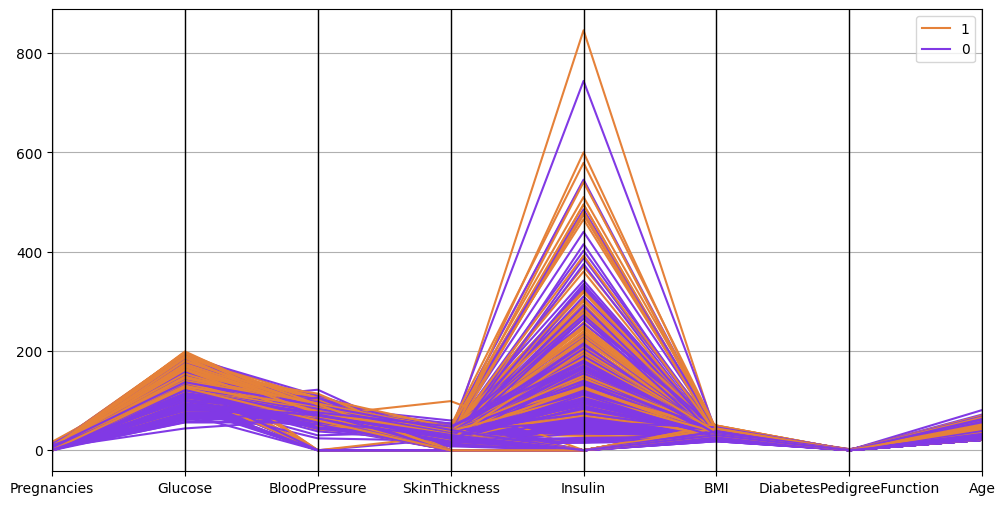

In [22]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")


plt.figure(figsize=(12,6))
pd.plotting.parallel_coordinates(db_health, "Outcome", color= ("#E58139", "#8139E5"))
plt.show()


#siendo 0 negativo en diabetes y 1, positivo (numérico) 

In [23]:
#separamos el outocme y lo colocamos en y para poder implementar el modelo de decision tree
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

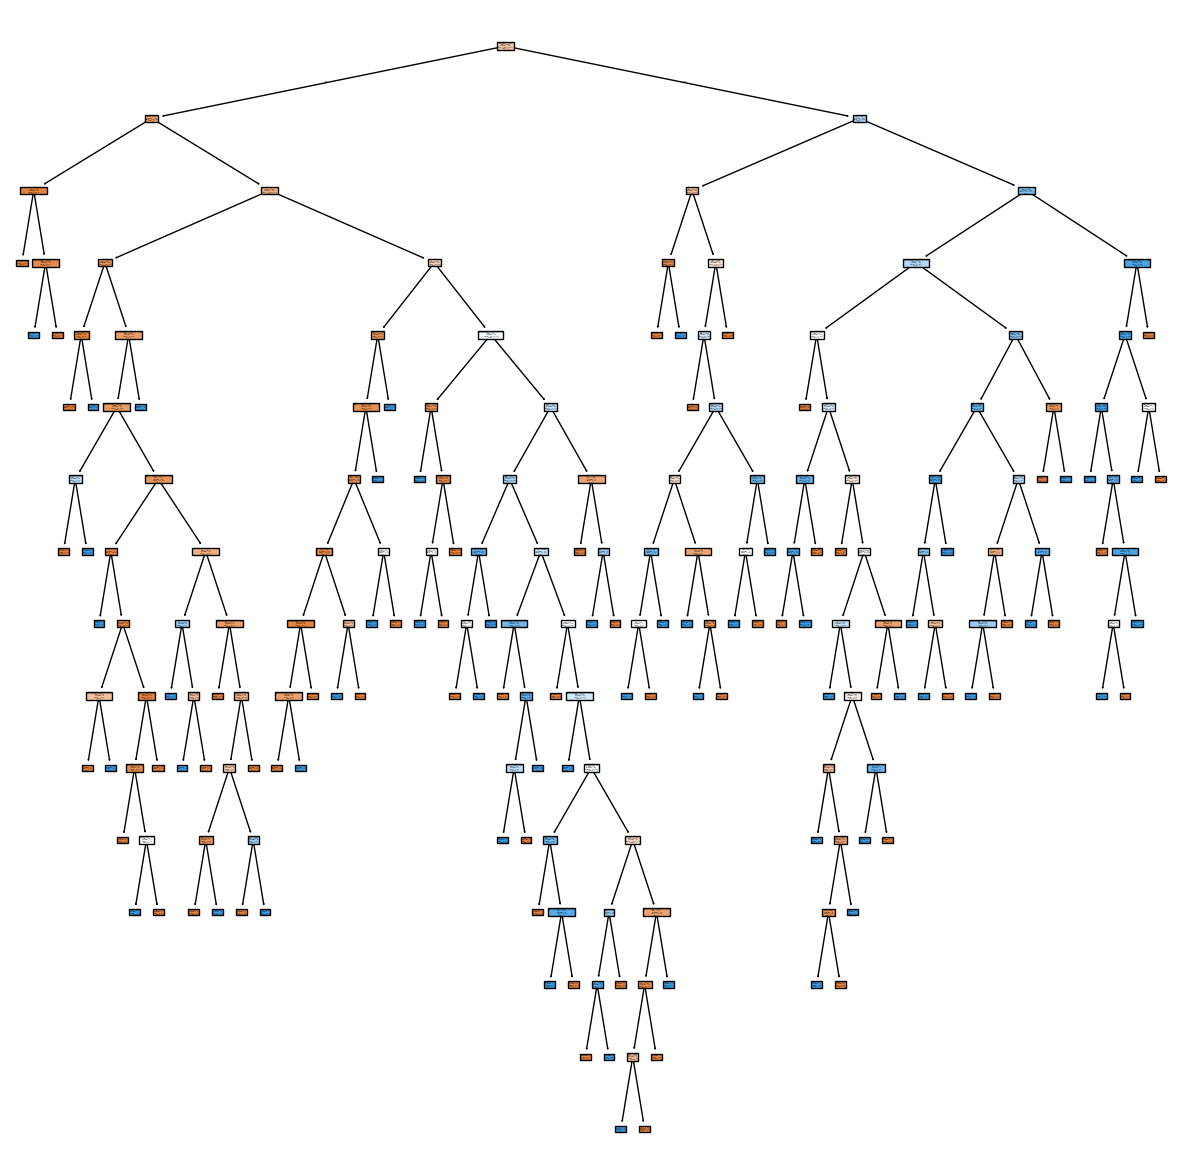

In [25]:
#GRAFICAMOS EL ARBOL PER SEI 

from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names= list(X_train.columns), class_names=["0", "1", "2"], filled=True)
plt.show()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [27]:
#   MIDO LA PRECISION
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7181208053691275

In [28]:
# USO CLASSFICATION REPORT
from sklearn.metrics import classification_report
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.52      0.57      0.54        44

    accuracy                           0.72       149
   macro avg       0.67      0.67      0.67       149
weighted avg       0.73      0.72      0.72       149



HACER OPTIMIZACION DEL MODELO
USAMOS GRID SEARCH PARA BUSCAR OPTIMIZAR HIPERPARAMETROS

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [30]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [31]:
#AJUSTO LSO HIPERPARAMETROS SEGUN RESULTADO DEL GRID SEARCH

model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [32]:
#hago la rped
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [33]:
#MIDO NUEVAMENTE EL ACCURACY
accuracy_score(y_test, y_pred)

0.738255033557047

USANDO EL GRID Y AJUSTANDO LOS HIPERPARAMETROS, EL ACCURACY HA PASADO DE 69 A 75%
LO HE CORRIDO DOS VECES, LA SEGUNDA ME HA DADO 71 CORRIENDO EL MODELO CON HIPER BASE, Y LUEGO CUANDO HICE EL AJSUTE SEGUN EL GRIDE ME HA DADO CASI 74%


In [34]:
#GUARDO EL MODELO
from pickle import dump

dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-2_minsplit2_42.pkl", "wb"))